In [3]:
import vertexai
from vertexai.language_models import TextGenerationModel

from utils import authenticate
credentials, PROJECT_ID = authenticate() 
REGION = "us-central1"

In [4]:
vertexai.init(project = PROJECT_ID,
              location = REGION,
              credentials = credentials)

### Deployment
 - Batch: There is no need for real-time processing. For instance, you might need to get predictions every weekend - Offline.
 - Rest API: Deploy the model as a REST API for real-time and online processing.

In [ ]:
# Model used for inference
model = TextGenerationModel.from_pretrained("text-bison@001")
list_tuned_models = model.list_tuned_model_names()

for i in list_tuned_models:
    print (i)

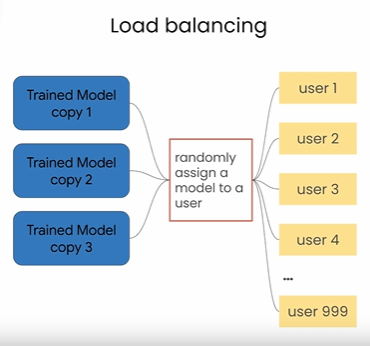

In [ ]:
# Randomly select from one of the endpoints to divide the prediction load.
import random
tuned_model_select = random.choice(list_tuned_models)

In [ ]:
# Getting the response
deployed_model = TextGenerationModel.get_tuned_model\
(tuned_model_select)

PROMPT = "How can I load a csv file using Pandas?"

response = deployed_model.predict(PROMPT)
print(response)

In [ ]:
# Making the response readable
from pprint import pprint
output = response._prediction_response[0]
pprint(output)

final_output = response._prediction_response[0][0]["content"]
print(final_output)

#### Prompt Management and Templates

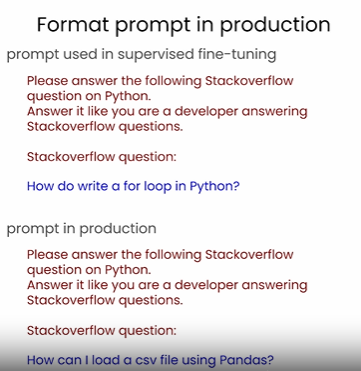

In [8]:
INSTRUCTION = """\
Please answer the following Stackoverflow question on Python.\
Answer it like\
you are a developer answering Stackoverflow questions.\
Question:
"""

QUESTION = "How can I store my TensorFlow checkpoint on\
Google Cloud Storage? Python example?"

PROMPT = f"""
{INSTRUCTION} {QUESTION}
"""

In [7]:
final_response = deployed_model.predict(PROMPT)
output = final_response._prediction_response[0][0]["content"]

print(output)